# Import Libraries

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from scipy import stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest,f_classif,mutual_info_classif,VarianceThreshold,RFE,chi2,SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer, KNNImputer
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTENC,SMOTE
from xgboost import XGBClassifier
from mlxtend.evaluate import bias_variance_decomp
import gensim
from gensim.models import Word2Vec,KeyedVectors
from sklearn.naive_bayes import GaussianNB
import re
import nltk
from nltk.corpus import stopwords
import emoji
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from sklearn.impute import SimpleImputer, KNNImputer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jarvis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Load Dataset

In [92]:
train_ds=pd.read_csv(r"C:\Users\jarvis\Desktop\JARVIS Jr ML Engineer\archive (8)\Corona_NLP_train.csv",encoding='latin1')
test_ds=pd.read_csv(r"C:\Users\jarvis\Desktop\JARVIS Jr ML Engineer\archive (8)\Corona_NLP_test.csv",encoding='latin1')
df = pd.concat([train_ds, test_ds])
df

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative


# EDA

### Data Info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44955 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       44955 non-null  int64 
 1   ScreenName     44955 non-null  int64 
 2   Location       35531 non-null  object
 3   TweetAt        44955 non-null  object
 4   OriginalTweet  44955 non-null  object
 5   Sentiment      44955 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.4+ MB


In [5]:
duplicate=df.duplicated().sum()
duplicate[duplicate>0]

array([], dtype=int64)

### Statistical Info

In [7]:
df.describe()

,UserName,ScreenName
count,44955.000000,44955.000000
mean,22478.000000,67430.000000
std,12977.535012,12977.535012
min,1.000000,44953.000000
25%,11239.500000,56191.500000
50%,22478.000000,67430.000000
75%,33716.500000,78668.500000
max,44955.000000,89907.000000


In [8]:
df.describe(include="object")

,Location,TweetAt,OriginalTweet,Sentiment
count,35531,44955,44955,44955
unique,13127,44,44955,5
top,United States,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,603,3448,1,12369


### Analysis

### Univariate

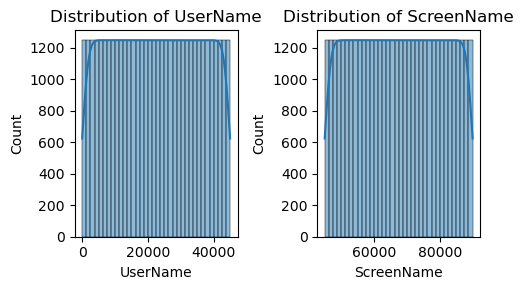

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(5, 3))
axes = axes.flatten()
for i, col in enumerate(df.select_dtypes(include="number").columns):
    sns.histplot(df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

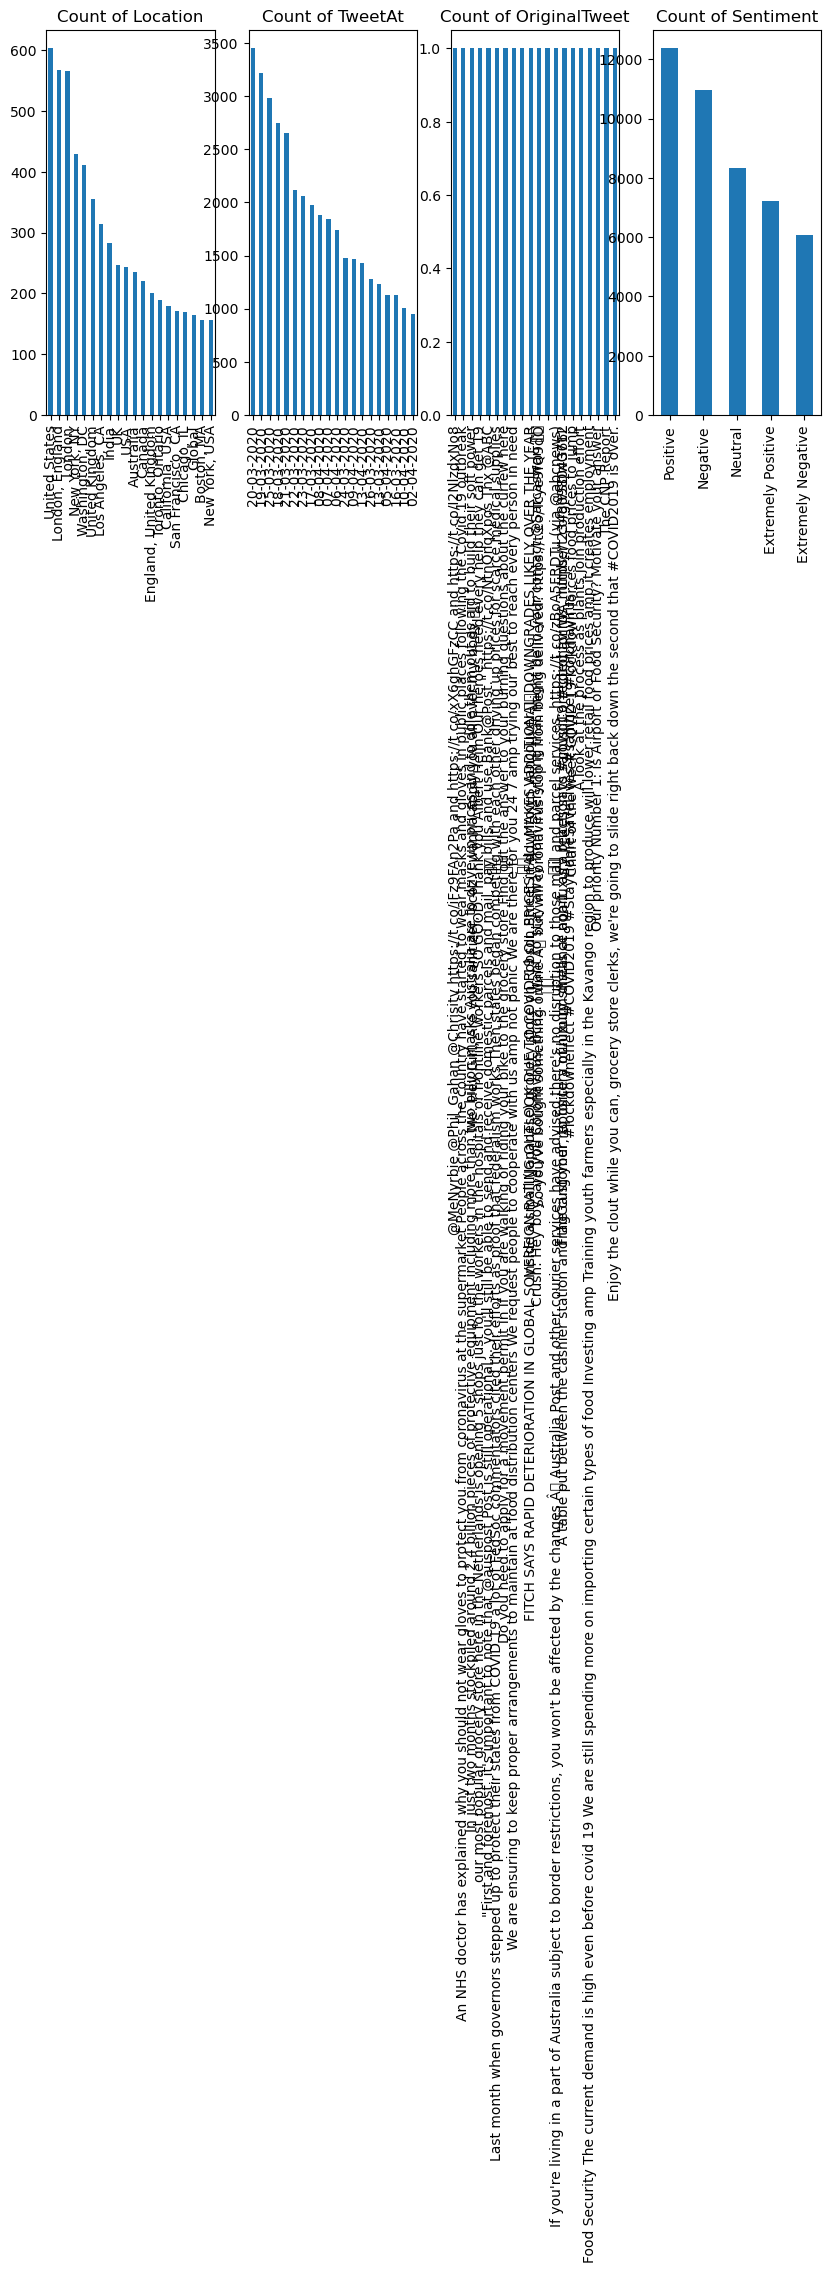

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(10, 5))
axes = axes.flatten()
for i,col in enumerate(df.select_dtypes(include="object").columns):
    df[col].value_counts(ascending = False).head(20).plot(kind = 'bar',ax=axes[i])
    #sns.countplot(credit_df[col], ax=axes[i])
    axes[i].set_title(f'Count of {col}')
    #axes[i].tick_params(axis='x', rotation=60) 
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='Sentiment'>

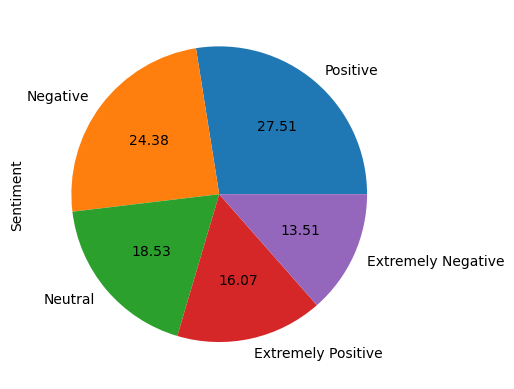

In [19]:
df['Sentiment'].value_counts().plot.pie(autopct='%.2f')

### Data Imbalance

<AxesSubplot:ylabel='Sentiment'>

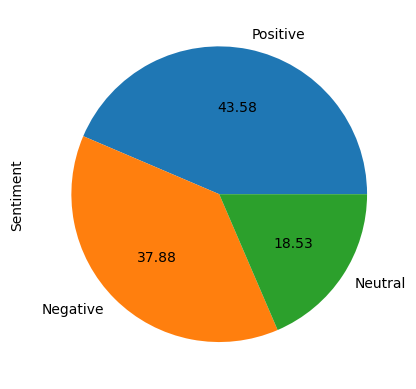

In [93]:
df.replace(['Extremely Negative', 'Extremely Positive'], ['Negative', 'Positive'], inplace=True)
df['Sentiment'].value_counts().plot.pie(autopct='%.2f')

### Preprocessing

In [94]:
df.drop(["UserName","ScreenName","Location","TweetAt"],axis=1,inplace=True)

In [24]:
def remove_tags(text):
    x=re.compile("<.*?>")
    clean=x.sub('',text)
    return clean

In [95]:
df['OriginalTweet']=df['OriginalTweet'].apply(remove_tags)

In [26]:
def remove_puncs(text):
    x=re.compile(r'[^\w\s]')
    clean=x.sub('',text)
    return clean

In [96]:
df['OriginalTweet']=df['OriginalTweet'].apply(remove_puncs)

In [32]:
def remove_mentions(text):
    x=re.compile(r'@\w+')
    clean=x.sub('',text)
    return clean

In [97]:
df['OriginalTweet']=df['OriginalTweet'].apply(remove_mentions)

In [30]:
def remove_hashtag(text):
    x=re.compile(r'#\w+')
    clean=x.sub('',text)
    return clean

In [98]:
df['OriginalTweet']=df['OriginalTweet'].apply(remove_hashtag)

In [34]:
def remove_url(text):
    x=re.compile(r'https?://\S+|www\.\S+')
    clean=x.sub('',text)
    return clean

In [99]:
df['OriginalTweet']=df['OriginalTweet'].apply(remove_url)

In [36]:
def only_alphabet(text):
    x=re.compile(r'[^A-Za-z]+')
    clean=x.sub('',text)
    return clean

In [100]:
df['OriginalTweet']=df['OriginalTweet'].apply(only_alphabet)

In [101]:
df['OriginalTweet']=df['OriginalTweet'].apply(lambda x:x.lower())

In [39]:
nltk.download('stopwords')
def remove_stopwords(text):
    l=[]
    sw=stopwords.words('english')
    for w in text.split():
        if w not in sw:
            l.append(w)
    return " ".join(l)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jarvis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [102]:
df['OriginalTweet']=df['OriginalTweet'].apply(remove_stopwords)

In [53]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\jarvis\AppData\Roaming\nltk_data...


True

In [54]:
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    l=[]
    for w in text.split():
        l.append(lemmatizer.lemmatize(w))
    return " ".join(l)

In [103]:
df['OriginalTweet']=df['OriginalTweet'].apply(lemmatize)

In [104]:
df['OriginalTweet'] = df['OriginalTweet'].apply(emoji.demojize)

# Feature Engineering

### Encoding

In [83]:
df['Sentiment'].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [127]:
le = LabelEncoder()
#df['Sentiment'] = le.fit_transform(df['Sentiment'])
df['Sentiment'].unique()

array([1, 2, 0])

### Imabalance Handling

In [128]:
X = df.iloc[:,0:1]
y = df['Sentiment']

In [129]:
tfidf_vectorizer = TfidfVectorizer(max_features=44955)
X_vectorized = tfidf_vectorizer.fit_transform(df['OriginalTweet'].values.astype('U'))

In [130]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_vectorized, y)

# Splitting

In [137]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

In [138]:
X_train=X_train.toarray()
X_test=X_test.toarray()

MemoryError: Unable to allocate 15.7 GiB for an array with shape (47020, 44920) and data type float64

# Training and Evaluation

In [134]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_test_pred_gnb = gnb.predict(X_test)
y_test_pred_gnb

MemoryError: Unable to allocate 15.7 GiB for an array with shape (47020, 44920) and data type float64